## Observations and Insights 

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [167]:
# Read Data files and create data frames
mouse_metadata = pd.read_csv("Data/Mouse_metadata.csv")
study_results = pd.read_csv("Data/Study_results.csv")

In [168]:
#Assess any duplicate data in mouse_metadata
mouse_metadata.head()
mouse_metadata.count()
#mouse_metadata["Mouse ID"].unique()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [169]:
#Assess any duplicate data in mouse_metadata
study_results.head()
study_results["Mouse ID"].value_counts() 
    #notice at least one mouse has duplicate time points (since time points for g989 is 13--but each mouse should only have 10 observations total)

g989    13
w914    10
q633    10
l725    10
a401    10
        ..
x226     1
l872     1
u153     1
f932     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [170]:
#Combine the two dataframes into a single dataframe
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", suffixes=("_meta", "_study"), how="inner")
df["Mouse ID"].value_counts()
    #I still have 249 mice after the merge
    #checked merge by changing the "how" optional paramater to "outer", "right", "left"--and I get the same counts for either type of merge
    #so I keep the default "inner" join

g989    13
r554    10
a401    10
t451    10
g316    10
        ..
n482     1
o848     1
f932     1
l872     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [171]:
# Get the ID number for mouse that has duplicate Mouse ID and Timepoint, and clean it out of the dataset 
df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
     #used this formula to find and show the duplicate values, revealing duplicate values for Mouse ID g989
df2 = df.loc[df["Mouse ID"] == "g989", :]
     #used this formula to find all index values associated with Mouse ID g989
df=df.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])
    #used this formula to drop all the indeces associated with Mouse ID g989
df["Mouse ID"].value_counts()
    #now the number of mic is 248, one less than the original 249 since we dropped mouse g989

y478    10
r554    10
a401    10
t451    10
g316    10
        ..
t573     1
u153     1
b447     1
n482     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

In [172]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [173]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped = df.groupby("Drug Regimen")
volume_mean=df_grouped['Tumor Volume (mm3)'].mean()
volume_median=df_grouped['Tumor Volume (mm3)'].median()
volume_std=df_grouped['Tumor Volume (mm3)'].std()
volume_variance=volume_std*volume_std
volume_sem=df_grouped['Tumor Volume (mm3)'].sem()

#Create a dataframe to summarize the statistics
df_grp_summary = pd.DataFrame({'Mean': volume_mean, 'Median': volume_median,'Variance': volume_variance,'Standard Deviation': volume_std, 'SEM': volume_sem})
df_grp_summary.head(10)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

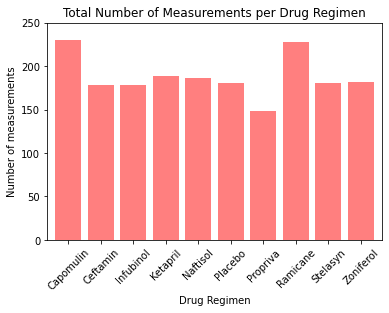

In [174]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_measures=df_grouped["Timepoint"].count()
    #this creates a variable for the total measures by drug regimen
#print(tot_measures)
bar_pd=tot_measures.plot(kind="bar", title="Total Number of Measurements per Drug Regimen",color='r',alpha=0.5,rot=45,ylabel="Number of measurements",ylim=[0,250],width=0.8)
    #use pandas for all the arguments to produce the plot below

(0.0, 250.0)

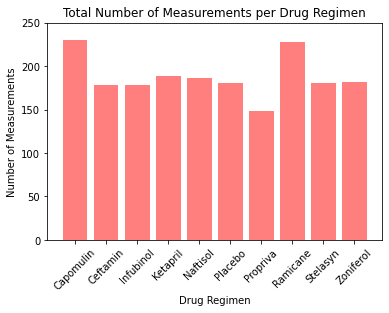

In [175]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tot_measures=df_grouped["Timepoint"].count()
    #this creates a variable for the total measures by drug regimen
#print(tot_measures)
plt.bar(["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],tot_measures, color='r', alpha=0.5, align="center", width=0.8)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Drug Regimen")
plt.ylim(0, 250)
    #use matplotlib for all the arguments to produce a plot similar to the one above

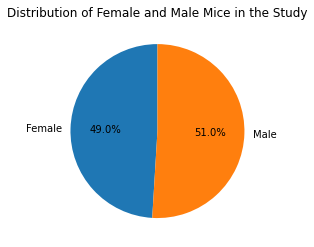

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_gender_grp=df.groupby("Sex")
gender_count=df_gender_grp.count()
#print(gender_count)
pie_pd=gender_count.plot(kind="pie", y="Mouse ID",title="Distribution of Female and Male Mice in the Study",autopct="%1.1f%%", startangle=90, legend="", ylabel="",)
    #use pandas for all the arguments to produce the plot below
    #added empty values in the end of the pie_pd argument to get rid of extra text

Text(0.5, 1.0, 'Distribution of Female and Male Mice in the Study')

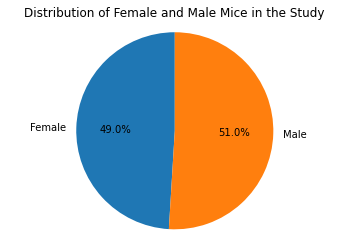

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([922,958], labels=["Female","Male"], autopct="%1.1f%%",startangle=90)
plt.axis("equal")
plt.title("Distribution of Female and Male Mice in the Study")

## Quartiles, Outliers and Boxplots

In [178]:
# Get the last (max) timepoint for each mouse
df_final_tp=pd.DataFrame(df.groupby(["Mouse ID"])["Timepoint"].max())
df_final_tp.count()
    #Check to see that there are 248 mice with a column for highest timepoint

final_tp_df = pd.merge(df, df_final_tp, on='Mouse ID',suffixes=("_df", "_max"))
final_tp_df.head()
    #Merge grouped df with the original dataframe to get a column for the latest timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_df,Tumor Volume (mm3),Metastatic Sites,Timepoint_max
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [186]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    #Capomulin, Ramicane, Infubinol, and Ceftamin

#Put treatments into a list for a for loop (and later for plot labels)
#Create empty list to fill with tumor vol data (for plotting)
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_vol = []
count=0

for drug in drugs:
    drug_df = final_tp_df.loc[final_tp_df['Drug Regimen'] == drug]
    final_vol_df = drug_df.loc[drug_df['Timepoint_df'] == drug_df['Timepoint_max']]
    last_vol.append(final_vol_df['Tumor Volume (mm3)'])
    
    quartiles = (final_vol_df['Tumor Volume (mm3)']).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For {drug}:")
    print(f"The lower quartile of the last recorded tumor volume is: {lowerq}")
    print(f"The upper quartile of the last recorded tumor volume is: {upperq}")
    print(f"The interquartile range of the last recorded tumor volume is: {iqr}")
    print(f"The the median of the last recorded tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)                 
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    
    #if final_vol_df['Tumor Volume (mm3)']>upper_bound:
        #count+=1
    #else: 
        #count=0
    #print(f"This drug has {count} outliers.")

For Capomulin:
The lower quartile of the last recorded tumor volume is: 32.37735684
The upper quartile of the last recorded tumor volume is: 40.1592203
The interquartile range of the last recorded tumor volume is: 7.781863460000004
The the median of the last recorded tumor volume is: 38.125164399999996 
Values below 20.70456164999999 and above 51.83201549 could be outliers.
For Ramicane:
The lower quartile of the last recorded tumor volume is: 31.56046955
The upper quartile of the last recorded tumor volume is: 40.65900627
The interquartile range of the last recorded tumor volume is: 9.098536719999998
The the median of the last recorded tumor volume is: 36.56165229 
Values below 17.912664470000003 and above 54.30681135 could be outliers.
For Infubinol:
The lower quartile of the last recorded tumor volume is: 54.04860769
The upper quartile of the last recorded tumor volume is: 65.52574285
The interquartile range of the last recorded tumor volume is: 11.477135160000003
The the median of 

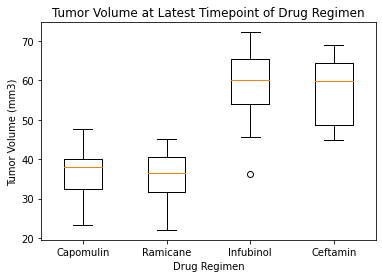

In [180]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Latest Timepoint of Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(latest_vol)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.line()

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
